## <span style='font-family:times new roman'>SPA5666 Final Project</span>

### <span style='font-family:times new roman'>Using the Lomb\-Scargle periodogram to find periodic signals in irregularly sampled data</span>



<span style='font-family:times new roman'><span style='font-size:medium'>Aditya Sudhir Naik</span></span>

<span style='font-family:times new roman'><span style='font-size:medium'>Department of Physics, Queen Mary, university of London, Mile End Road, London, E1 4NS, U.K</span></span>


#### <span style='font-family:arial'>_**Introduction**_</span>

The Lomb\-Scargle Periodogram is a mathematical tool used to find periodic signals in irregularly sampled data and is widely used in astronomy to identify and characterize celestial bodies observed through radio telescopes. Said irregular sampling is a result of various factors such as telescope availability, weather conditions and position of the target celestial object in the sky. Usually, Fourier analysis would be used to find periodicity in a dataset, however, Fourier analysis cannot handle unevenly sampled data which led to N.R. Lomb and J.D. Scargle, who were statisticians in the 1970s, to develop this technique of generating a Fourier power spectrum from which we can get the value of the period of oscillation for an irregularly sampled dataset. 

Another name for this technique is the Least Squares Spectral analysis, which gives a clue as to how this technique works – by using the method of least squares fitting over a sinusoidal data, much like Fourier analysis. The central idea behind the Lomb\-Scargle periodogram is to fit a sinusoidal curve to the data, using a least\-squares optimization method as mentioned earlier. The frequency of the sinusoid that best fits the data is then taken to be the periodic signal in the data. The strength of the periodic signal is measured by the power of the sinusoidal fit, which is quantified by the Lomb\-Scargle periodogram. In this report, a simplistic version of the Lomb\-Scargle periodogram will be built as a proof of concept and sample data with a known period will be fed to it to test its efficacy. Later, a real life example will be used – irregularly sampled radial velocity data from the star 51\-Pegasi will be imported and its period will be found using an external Python library called Astropy, which has a dedicated module for the Lomb\-Scargle periodogram. Along with the Astropy library, additional Python libraries such as Matplot and Seaborn will be used for plotting the graphs and libraries such as NumPy and Math will be used for added numerical precision for calculations. These techniques will be explained in detail later in the report with the respective code.


---



#### _**Methods**_



##### Section A: Developing the Lomb\-Scargle Periodogram

As mentioned in the Introduction, the Lomb\-Scargle periodogram is very similar to Fourier analysis and is in fact based on it, but it differs in its ability to handle irregularly sampled data. To develop the Lomb\-Scargle periodogram we must first understand Fourier analysis. A Fourier transform converts a function or signal from the time domain to the frequency domain. This is done by representing the function or signal as a sum of sinusoidal functions with different frequencies, amplitudes, and phases. The resulting frequency spectrum can then be analysed to determine the individual frequency components of the signal and their relative strengths. For example, consider a simple sine wave with a single frequency of 10 Hz. A Fourier transform of this sine wave would show a single peak at 10 Hz, indicating that the sine wave is made up of a single frequency component. If the sine wave were more complex, with multiple frequency components, the Fourier transform would show multiple peaks at the corresponding frequencies. The equation that encompasses this procedure is the following: 

$$
g(f) = \int_{-\infty}^\infty g(t)e^{-2\pi ift} dt
$$

where $g(f)$ is the Fourier transform of the continuous signal $g(t)$, $f$ is the angular frequency, and $i$ is an imaginary number. An important property of Fourier transforms that leads us to the Lomb\-Scargle periodogram is that the squared amplitude of a Fourier transform allows us to obtain the power spectral density by removing the imaginary part of the transform. This can be written in the following way:

$$
P_g =|F(g)|^2
$$

where $P_g$ is the power spectral density, and $F(g)$ is the Fourier transform of the function $g(t)$. The power spectral density is a function that quantifies the contribution of each frequency $f$ to the total signal in $g(t)$. This allows us to identify the dominant frequency in the signal which is indeed the aim of the Lomb\-Scargle periodogram. Another important aspect of Fourier transforms is the convolution theorem. When two or more waves convolve \(i.e. pass each other and interact\), the convolution theorem states that if the Fourier transform of this convolution is taken, the result will be the pointwise product of the Fourier transform. What this means is that we can break down a composite signal containing multiple waves with different properties into a plot of the relative amplitudes of the different frequency components of the original signal. Finally, the Lomb\-Scargle periodogram can be written as:

$$
P_{LS}(f) = \frac{1}{2}(\frac{\sum_ng_ncos(2\pi f[t_n-\tau])^2}   {\sum_ncos^2(2\pi f[t_n-\tau])} + \frac{(\sum_ng_nsin(2\pi f[t_n-\tau])^2}{ \sum_nsin^2(2\pi f[t_n-\tau])})
$$

where $P_{LS}$ is the Lomb\-Scargle periodogram, $\tau$ is specified for each $f$ to ensure time\-shift invariance and is defined as:

$$
\tau = \frac{1}{4\pi f}tan^{-1}(\frac{\sum_nsin(4\pi f t_n)}{\sum_ncos(4\pi f t_n)})
$$

The above formulae define what is known as the generalized Lomb\-Scargle periodogram. In this report however, we are going to create a working model of the classical Lomb\-Scargle periodogram which is defined as the following:

$$
P_{LS} = \frac{1}{N} |\sum_{n=1}^N g_ne^{-2\pi ift_n}|^2
$$

where $t_n$ corresponds to the observation times. One may notice that in this formula we have $g_n$ instead of just $g$. This is because the part inside the modulus is the discrete Fourier transform which means that the function $g(t)$ is sampled at regular intervals instead of being continuous. We are using this version because the generalised version is computationally heavy to process arithmetically and Python libraries such as Astropy have created shortcuts around the computation to make the process faster \- which is why this library will be used to generate the final result for the report. To create a working version of the classical Lomb\-Scargle periodogram, the first step is to generate test data which we will use to test the efficacy of the method we have developed. This is done in the following function named generate\_data:



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn

from astropy.timeseries import LombScargle
from scipy.optimize import minimize
seaborn.set()

In [2]:
# The following function generates periodic test data which will be used for developing the Lomb-scargle method

def generate_data(x, period=1, amplitude=1, phase=0, noise=0):
    mag = amplitude * np.sin(((2 * math.pi * x) / period) - phase)
    d_mag = np.random.normal(0, np.sqrt(noise), size=len(x))

    return mag + d_mag

Text(0.5, 1.0, 'Raw data plot')

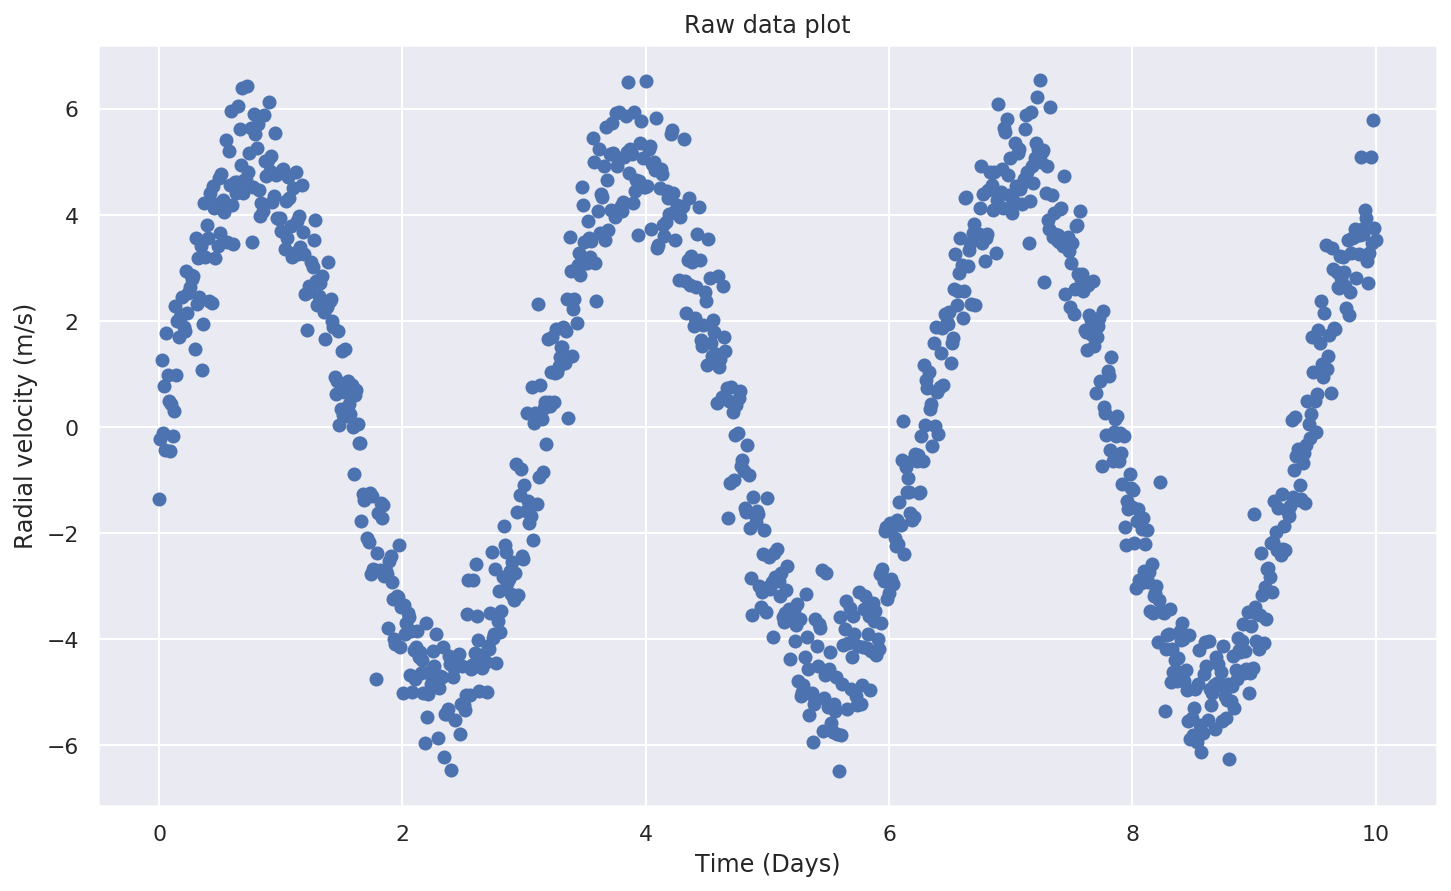

In [3]:
x = np.linspace(0, 10, 1000)
y = generate_data(x, period=math.pi, amplitude=5, phase=0, noise=0.5)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Radial velocity (m/s)")
ax.set_title("Raw data plot")

# The following is the plot of the test data generated by the function above. This is a restricted model with not a lot of noise which is not something you'd see in a real life situation

As mentioned, the function above generates test data for feeding into the Lomb\-Scargle periodogram we will create. It does this by using the following formula:

$$
y = A *sin (\frac{2\pi x}{P} - \phi) + \sigma_n
$$

where $A$ is the amplitude \(in the real dataset, this is the equivalent of radial velocity\) and $P$ is the period of the wave, with $\phi$ being the phase offset and $\sigma_n$ being the noise in the data, which is generated using the random module in the NumPy library. In the function, the data is called mag \(for magnitude\) and the noise is called d\_mag \(error in magnitude\). This data is given in the form of a NumPy array. Now that we've defined a function that will generate data, the next step is to create the chi\-squared functions:


In [4]:
# The following is the function that calculates the chi-squared value given the frequency, amplitude and phi values for each observation (data point)

def chi_squared(theta, y, y_unc, x, f):
    amplitude = theta[0]
    phi = theta[1]
    return np.sum(((y - amplitude * np.sin(2 * np.pi * f * (x - phi))) / y_unc) ** 2)

In [5]:
# The following function minimises the chi-squared

def minimised_chi_sq(theta, y, y_unc, x, f):
    result = minimize(chi_squared, theta, args=(y, y_unc, x, f))
    return result.fun

The two functions above called chi\-squared and minimised\-chi\-squared respectively. This is done before the Lomb\-Scargle periodogram itself is defined because as observed by N.R. Lomb, the result one obtains by fitting a sinusoid model to the data at each frequency $f$ and constructing a periodogram from the corresponding $\chi^2$ values at each frequency $f$, is identical to the generalized Lomb\-Scargle periodogram. The formula being used for chi\-squared is the following:

$$
\chi^2 = \sum_n(\frac{y_n - y(t_n)}{\sigma_n})^2
$$

where $\sigma_n$ are the uncertainties in the dataset. This is also a point where the Lomb\-Scargle periodogram differs from Fourier analysis \- there is no natural way to include uncertainties in Fourier analysis like is being done here. One may notice that the minimised\-chi\-squared function uses the minimize module from SciPy. This is because this module figures out the optimal values that should be fed to the chi\-squared function much faster and more accurately than a human would by varying the parameters in a brute\-force style computation. 

The next and final step before we define the periodogram itself is to define a frequency grid. Choosing an appropriate frequency grid is extremely important as if done improperly, the result one is looking for will never appear in the periodogram, thereby rendering the method moot. Choosing a frequency grid has two aspects: frequency limits and grid spacing, both of which are important and can change the final result. For the frequency limits, choosing the lower limit is trivial since it can just be set to zero without any consequences for the answer or computational time. The upper limit however, must be chosen with caution. If the data was regularly sampled, the upper limit would be the Nyquist frequency \- a sampling method that converts a continuous function or signal into a discrete sequence and is determined by the value of $f_o$, which is the observation frequency. However, for an irregularly sampled dataset, the upper limit is determined based on the maximum frequency one expects to see in the dataset. The grid spacing to be used can be determined by using information such as how many observations take place in a set amount of time, and the total amount of time. For example, if a telescope has a survey duration of 5 years, and cannot recover periods less than 1 hour, the amount of grid points required to sample the periodogram would be 218,996.

Now that we've considered the frequency grid, we can move on to the main point of this report \- the Lomb\-Scargle periodogram:



In [6]:
# The following function calculates the Lomb-Scargle periodogram for the observations (data points) using a frequency grid. It returns the power spectral density which will be plotted to find the period of the data

def lomb_scargle(y, y_unc, x, freq_grid):
    power_spectral_density = np.empty_like(freq_grid)
    chi_sq = np.sum(((y - np.mean(y)) / y_unc) ** 2)

    for f_num, f in enumerate(freq_grid):
        power_spectral_density[f_num] = 0.5 * (chi_sq - minimised_chi_sq([0, 0], y, y_unc, x, f))

    return power_spectral_density

As defined in the function above, the Lomb\-Scargle periodogram uses the chi\-squared function defined above and needs an appropriate frequency grid to be passed to it in order to work. It returns the power spectral density in the form of a NumPy array. This array will be plotted in the results section and will show the period \(if it exists\) in an array of irregularly sampled data. Since we've found a period of oscillation in our dataset, we can represent this periodicity with a phase\-folded graph. Phase\-folded graphs contain data that is “folded” to fit within a mathematically defined/determined period. If the chosen period is incorrect, the periodicity cannot be seen so this must be done after finding a period of osciallation. The following function defines this method:


In [7]:
# The following function creates a phase folded plot of the time and magnitude data passed to it

def phase_plot(x, y, period, y_unc=0.0):
    phases = (x / period) % 1
    if type(y_unc) == float:
        y_unc = np.zeros_like(x)
    
    plot_order = np.argsort(phases)
    fig, ax = plt.subplots()
    ax.errorbar(phases[plot_order], y[plot_order], y_unc[plot_order], fmt="o", mew=0.1)
    ax.set_xlabel("Phase")
    ax.set_ylabel("Magnitude")
    ax.set_title("Test data Phase-folded plot")

##### Section B: Real life example using Astropy

Now we move on to a real life example. We will be using observed radial velocity data from the star 51\-Pegasi \(which contains a lot of noise and gaps\) and finding its period. Since there are limitations to the method formulated above \(this will be explained in the discussion section\), we will be using the Astropy library to obtain results. 51\-Pegasi is a G\-class star, much like our Sun, and is located 50.6 light years away from Earth. It has one planet, 51\-Pegasi B orbiting it. The radial velocity data will be imported using the loadtxt module in the NumPy library, and plotted as is by using Matplot and Seaborn to get an idea of how irregularly sampled the data is:



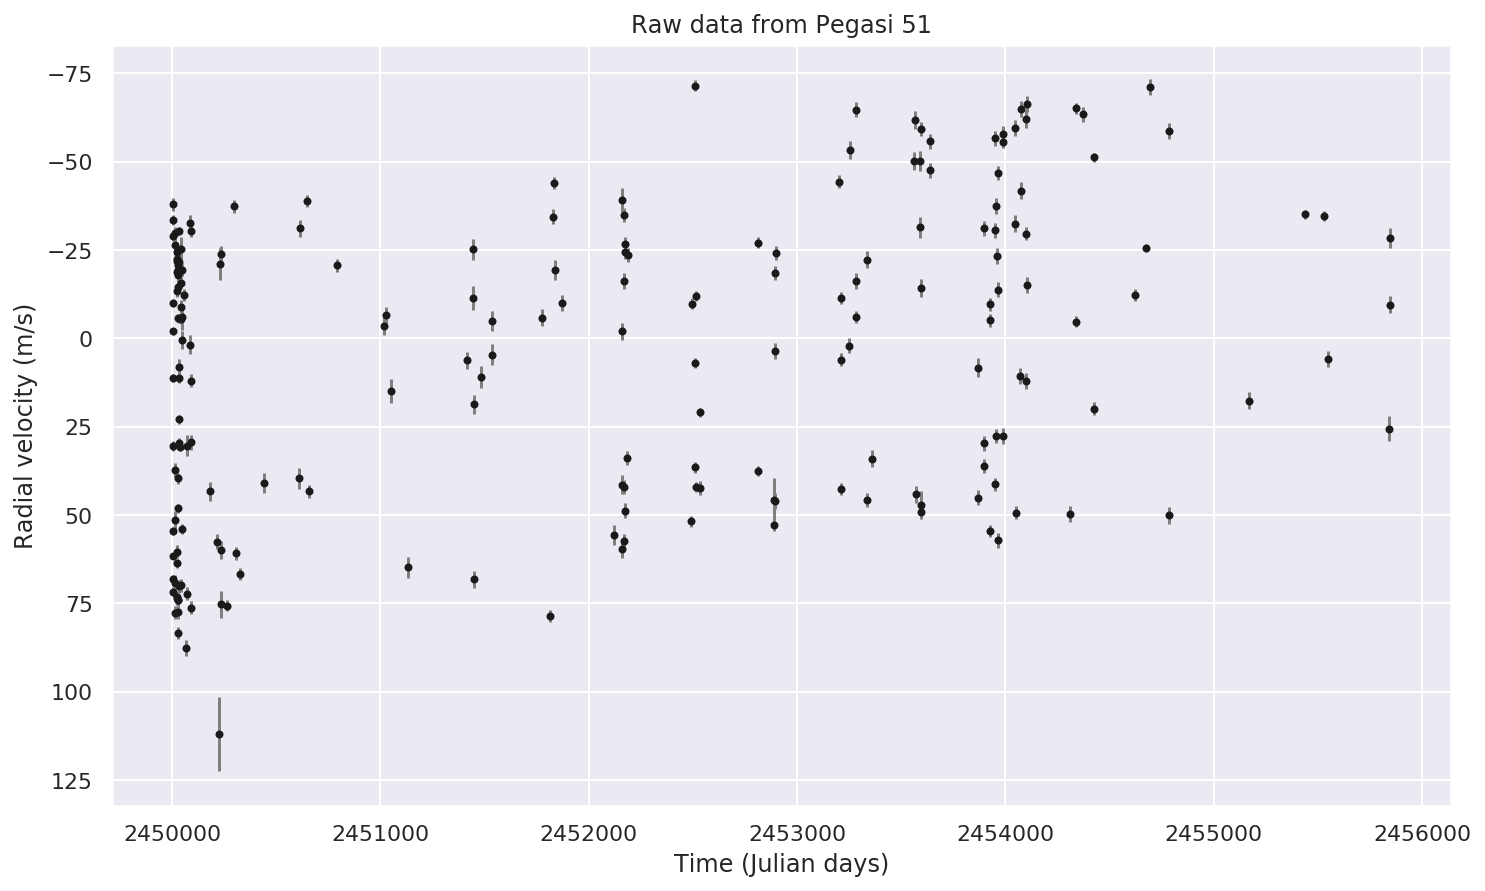

In [8]:
time, magnitude, magnitude_err = np.loadtxt("51-Peg.dat", dtype=np.float64, unpack=True)

fig, ax = plt.subplots()
ax.errorbar(time, magnitude, magnitude_err, fmt=".k", ecolor="gray")
ax.set_xlabel("Time (Julian days)")
ax.set_ylabel("Radial velocity (m/s)")
ax.set_title("Raw data from Pegasi 51")
ax.invert_yaxis()

Now we can move on to using the Lomb\-Scargle module in the Astropy library to find the period of oscillation in this irregularly sampled data: \(All the values obtained will be shown in the results section\)


In [9]:
# The following uses the Astropy module LombScargle to find the period of the observed data

Lomb_Scargle_result = LombScargle(time, magnitude, magnitude_err)

frequency, power = Lomb_Scargle_result.autopower(nyquist_factor=1000, minimum_frequency=0.1)

period = 1.0 / frequency

best_period = period[np.argmax(power)]

phase = (time / best_period) % 1

As can be seen above, the Lomb\-Scargle module from Astropy takes in time data, radial velocity data and uncertainty of measurement in said radial velocity data as its parameters and returns two arrays: frequency and power. The frequency array is then used to create a period array, from which the true period of oscillation is found by using the argmax function from NumPy with the power array as a reference. This value of period is then used to calculate the phase which will be used to plot the phase\-folded plot later in the results section.


---



#### _Results_

Since we have defined everything that needed to be defined for us to find the graphs and values we need, we now move on to the results section. In this section all the functions defined in the Methods section will be called and the respective results will be plotted using the Matplot and Seaborn libraries.

First, the results from Section A of Methods will be plotted. Since the raw data plot has already been plotted in the Methods section, we move on to the Lomb\-Scargle periodogram. For this, a frequency grid must be defined as explained earlier. This is done with the help of the NumPy function Peak\-to\-Peak which finds the range of a given array. One may notice that 1000 grid spacing points are used. The reason for this will be explained in the Discussion section. The result of the Lomb\-Scargle periodogram is stored in the NumPy array PSD\_result.


In [10]:
x = 10 * np.random.rand(100)
y = generate_data(x, period=math.pi, amplitude=5, noise=0.5)
y_unc = np.ones_like(x) * np.sqrt(0.5)

freq_grid = np.linspace((1 / np.ptp(x)), 10, 1000)

PSD_result = lomb_scargle(y, y_unc, x, freq_grid)

Now that the result of the Lomb\-Scargle has been obtained, it can now be plotted:


Text(0.5, 1.0, 'Test data Lomb-Scargle periodogram')

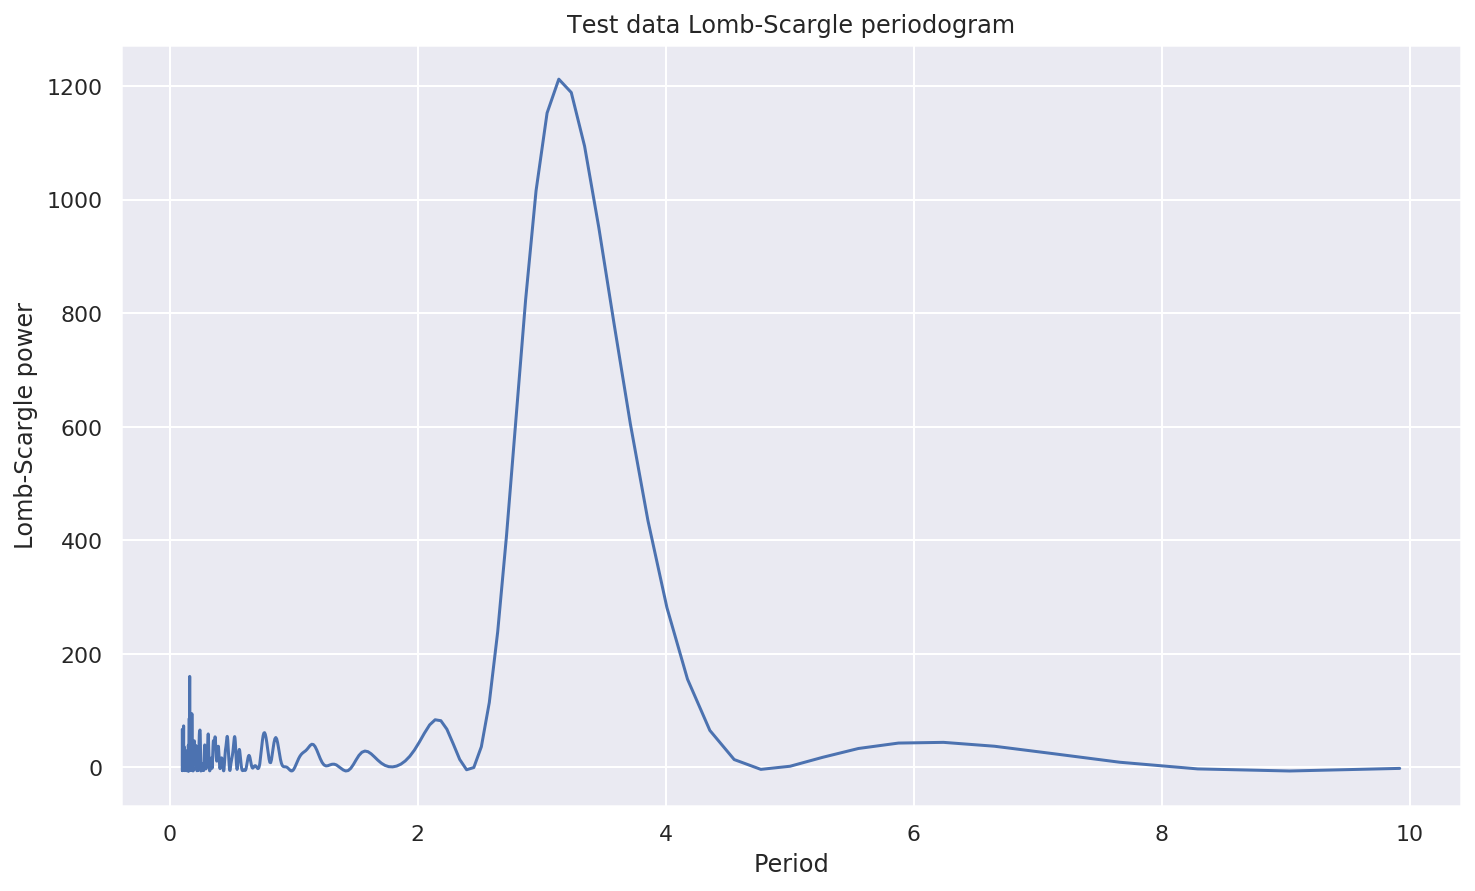

In [11]:
fig, ax = plt.subplots()
ax.plot((1 / freq_grid), PSD_result)
ax.set_xlabel("Period")
ax.set_ylabel("Lomb-Scargle power")
ax.set_title("Test data Lomb-Scargle periodogram")

As can be seen from the graph above, the algorithm created for the Lomb\-Scargle periodogram works, giving the period to a reasonably high accuracy. The period fed to the generate\_data function was $\pi$ and the periodogram shows a peak at the same place, thereby proving its efficacy. This will be discussed later in the report. Now, as mentioned earlier, we can prove the periodicity of the dataset by plotting a phase\-folded plot:


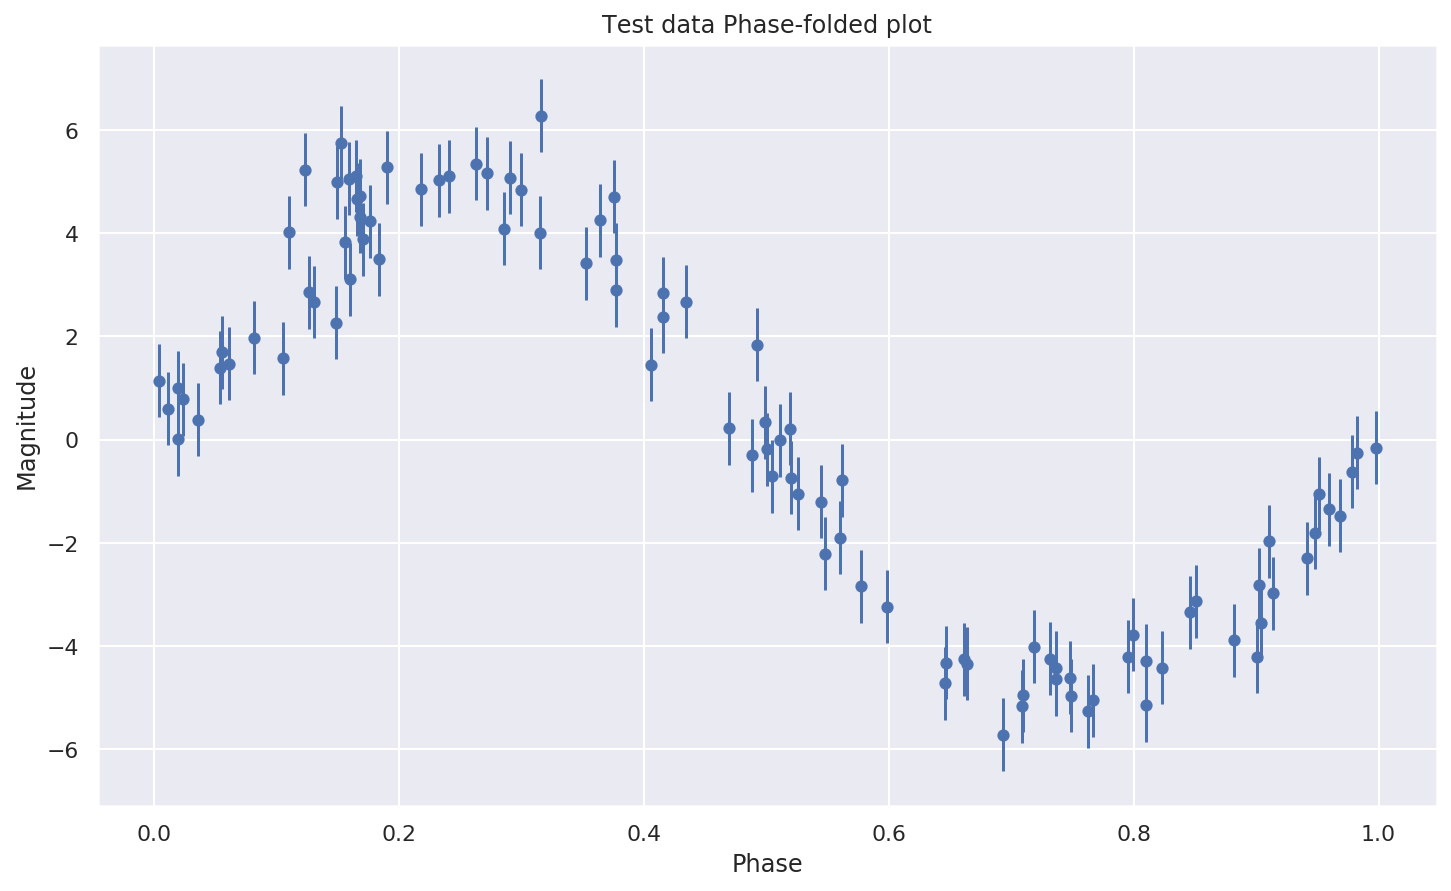

In [12]:
# The following plots the phase-folded graph for the result obtained above

phase_plot(x, y, (1 / freq_grid)[np.argmax(PSD_result)], y_unc)

Now we can move on to the results obtained from Section B of Methods. First, the Lomb\-Scargle periodogram obtained from the Astropy library will be plotted, and then the phase\-folded plot will be created:


Text(0.02, 0.21, 'Period of oscillation = 4.2311 days')

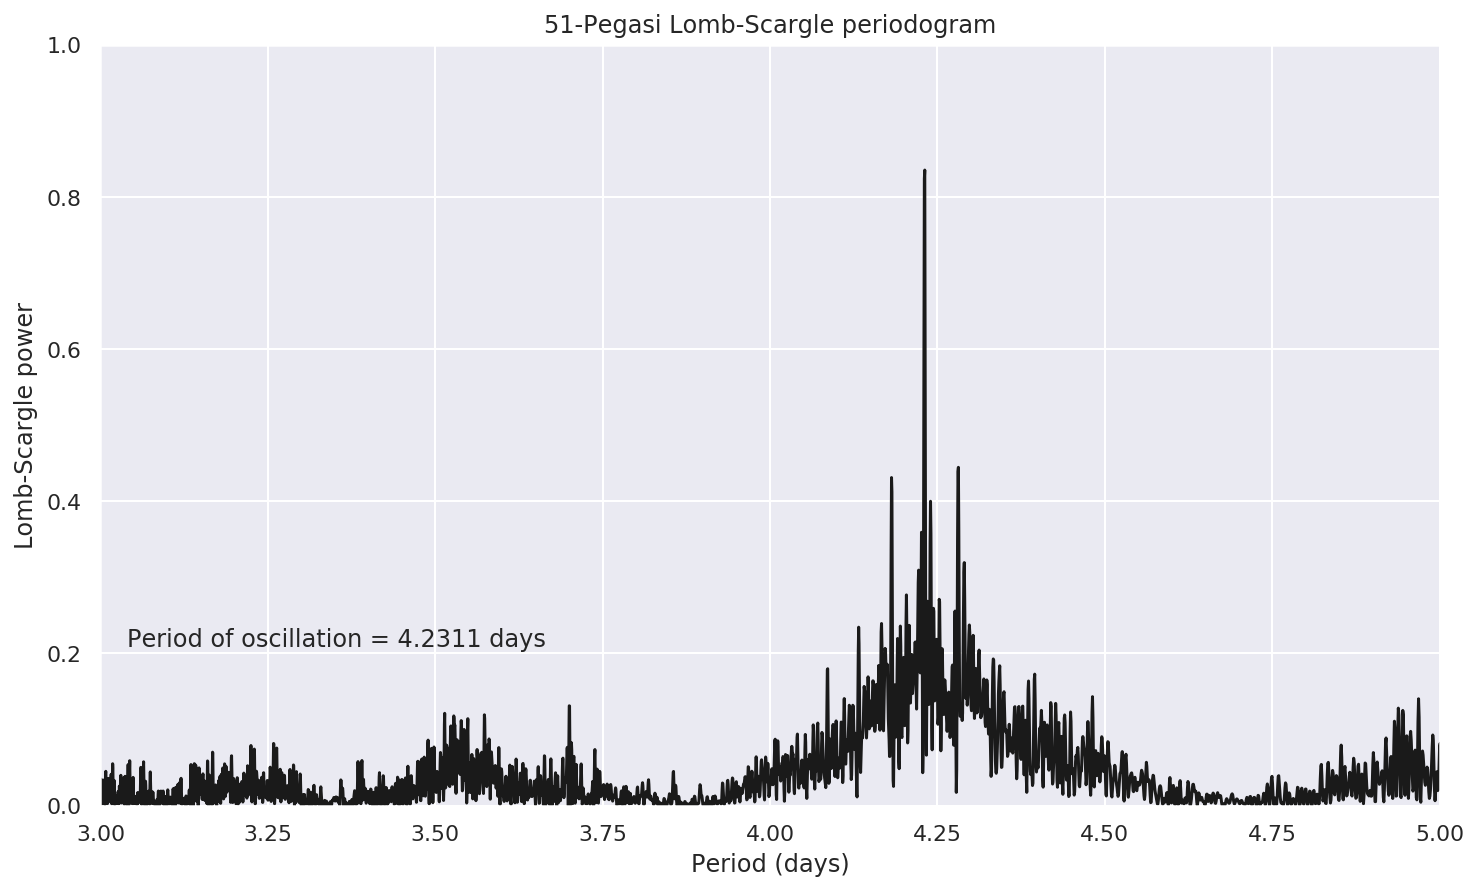

In [13]:
fig, ax = plt.subplots()
ax.plot(period, power, "-k")
ax.set(xlim=(3, 5), ylim=(0, 1), xlabel="Period (days)", ylabel="Lomb-Scargle power", title="51-Pegasi Lomb-Scargle periodogram")
ax.text(0.02, 0.21, "Period of oscillation = {0:.4f} days".format(best_period), transform=ax.transAxes)

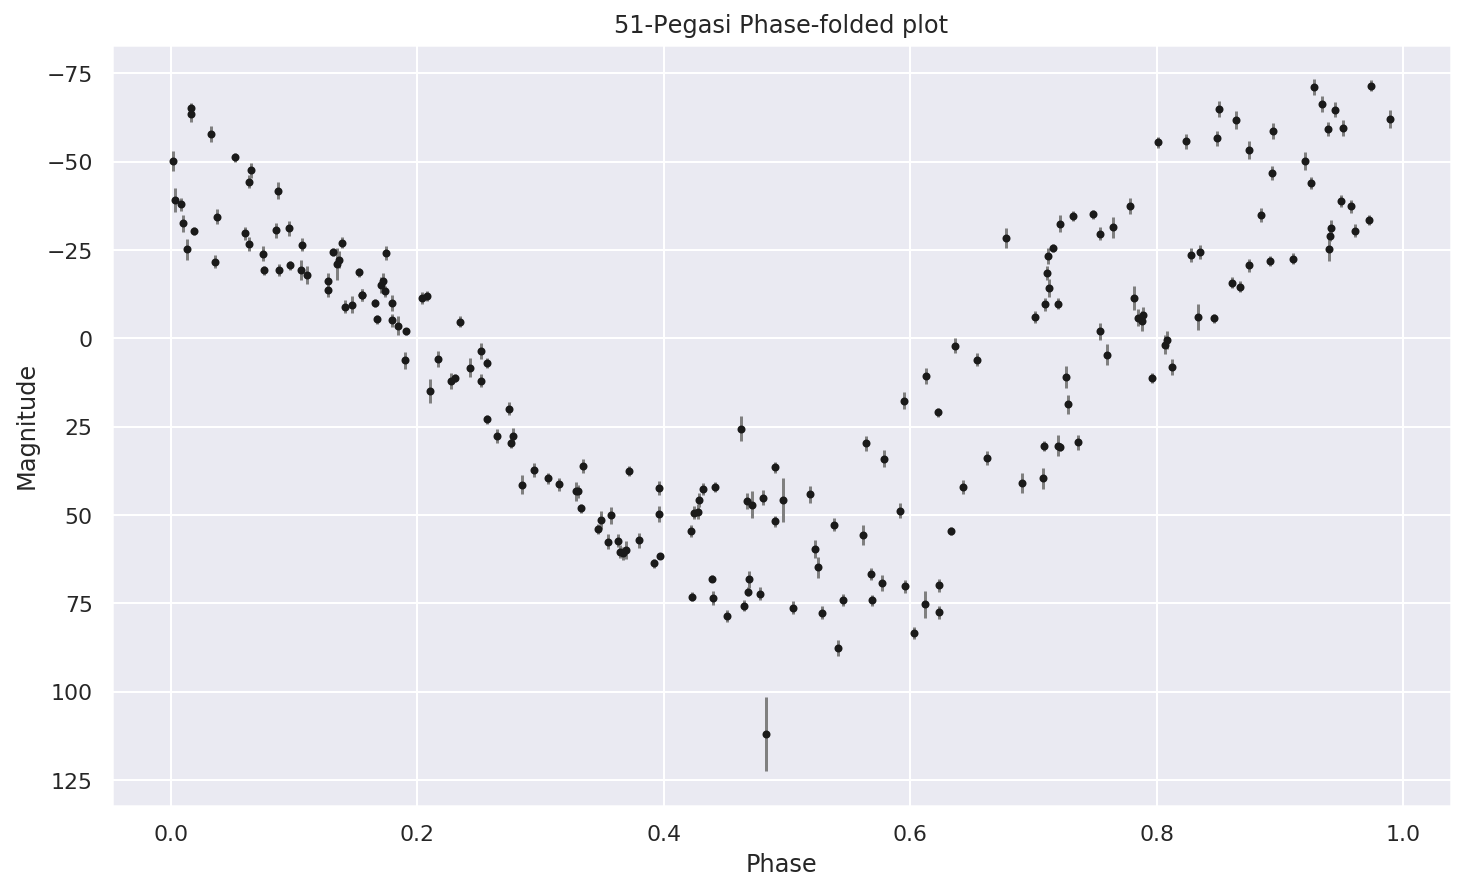

In [14]:
fig, ax = plt.subplots()
ax.errorbar(phase, magnitude, magnitude_err, fmt=".k", ecolor="gray")
ax.set(xlabel="Phase", ylabel="Magnitude", title="51-Pegasi Phase-folded plot")
ax.invert_yaxis()

The above graphs are the final result of the report which clearly show the correct result \- period of star Pegasi\-51 is 4.23 days. This result will be discussed later in the report. 

---



#### _Discussion_

##### Section A

The Section A results prove that the Lomb\-Scargle periodogram model developed works as expected, showing a peak at the correct period of oscillation. However, not only did the computation of results take a substantially higher time than the Astropy library's module, this model cannot be used for large datasets such as the one for 51\-Pegasi. The reason for this has to do with the frequency grid. For a dataset's results to be even reasonably accurate, there need to be 20,000\+ grid spacing points which creates a computational task too heavy for the model developed here. If one were to decrease the grid spacing points, one risks losing accuracy in the final result as well. For example, if we were to use the same dataset for 51\-Pegasi with this model that only has 1000 grid spacing points:


In [15]:
x_data = time
y_data = magnitude
y_data_unc = magnitude_err

freq_grid = np.linspace(1/np.ptp(x), 10,1000)
psd_ls = lomb_scargle(y_data, y_data_unc, x_data, freq_grid)

Text(0.5, 1.0, 'Section A method Lomb-Scargle periodogram')

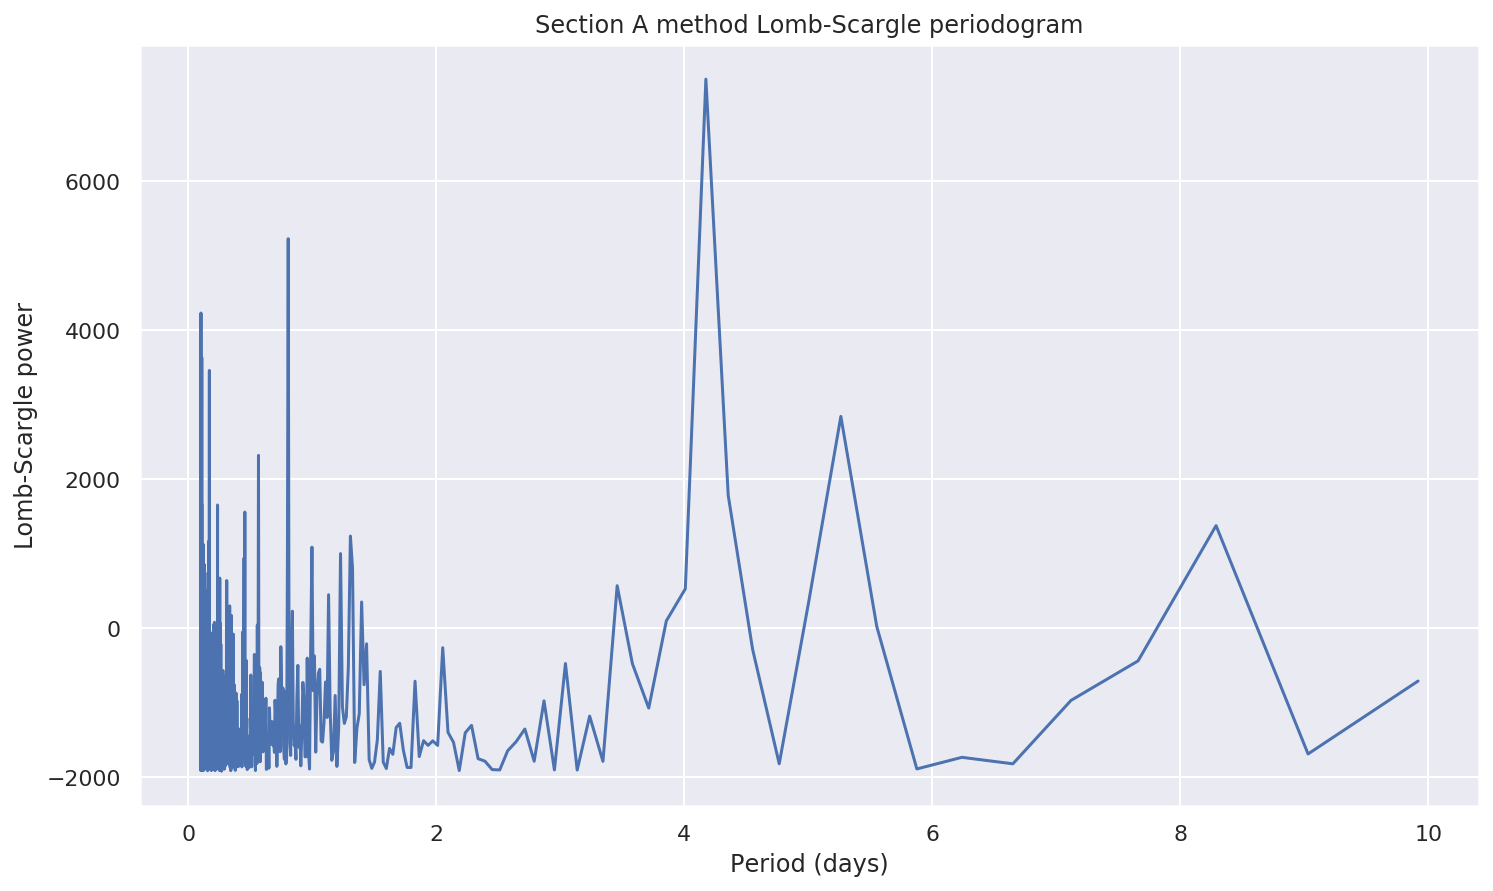

In [16]:
fig, ax = plt.subplots()
ax.plot(1/freq_grid, psd_ls)
ax.set_ylabel('Lomb-Scargle power')
ax.set_xlabel('Period (days)')
ax.set_title("Section A method Lomb-Scargle periodogram")

As one can see, even if the initial burn in period is ignored, the result is not dependable. So the Astropy library must be used as was done in Section B, which does the calculation faster, and more accurately. Another point that needs to be taken into consideration is the amount of irregularity \(i.e. noise\), a dataset has. To keep the calculations fast, the noise in the data generated by the function generate\_data was kept low at 0.5. If the signal noise were to increase, the computation would take substantially longer \(this incorrect graph above takes 20\+ seconds\).


##### Section B

The Section B code worked as expected \- producing a highly accurate result with low computational time: 51\-Pegasi has a period of 4.2311 days. However, the result was not as accurate as the internationally accepted literature: 4.2307 days. This error is likely due to the computational method used by the Astropy module which focuses more on the speed of calculation than accuracy. Finding the period of oscillation from an irregularly sampled dataset like that is extremely important in the field of astronomy today. As mentioned in the Introduction, due to certain factors that astronomers mostly have no control over, a continuous sampling of celestial objects through radio telescopes is not possible. In such cases, finding the period of oscillation is extremely vital to study said celestial objects as the period tells us not just about its orbital data such as shape of orbit and period of revolution, but when used in conjunction with other astronomy techniques such as transit data or direct imaging, the period of oscillation can be used to learn more about the properties of the exoplanet, such as its mass, size, and surface features. 

Since the Lomb\-Scargle periodogram works by fitting a sinusoid to the data, a line of best fit can be plotted to the phase\-folded plot, which allows us to see the periodicity even more clearly. This can be done using the model\(\) function in the Lomb\-Scargle module of the Astropy library:



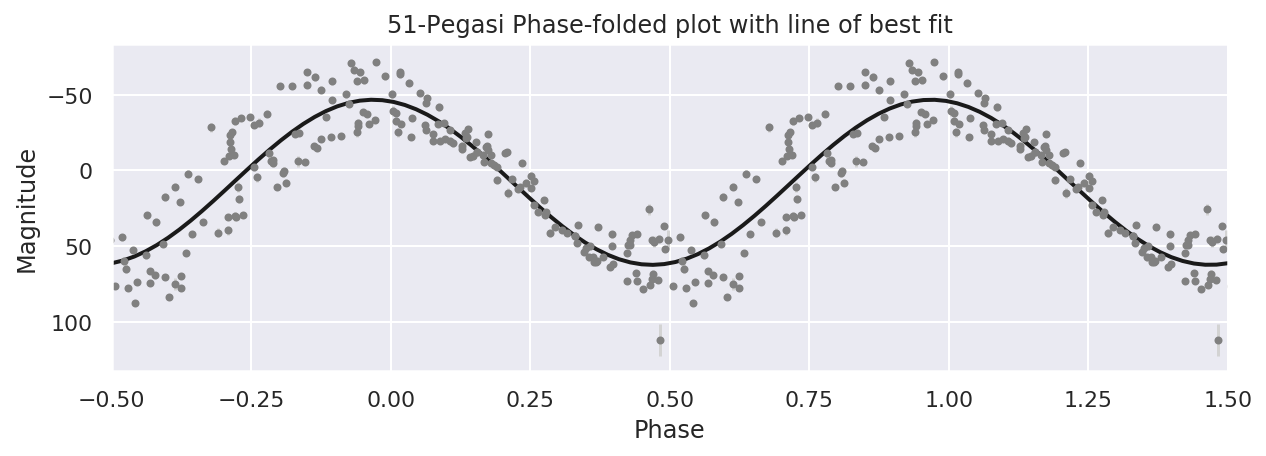

In [17]:
fig, ax = plt.subplots(figsize=(10, 3))

phase_model = np.linspace(-0.5, 1.5, 100)
best_frequency = frequency[np.argmax(power)]
mag_model = Lomb_Scargle_result.model(phase_model / best_frequency, best_frequency)

for offset in [-1, 0, 1]:
    ax.errorbar(phase + offset, magnitude, magnitude_err, fmt='.',
                color='gray', ecolor='lightgray', capsize=0)
ax.plot(phase_model, mag_model, '-k', lw=2)
ax.set(xlim=(-0.5, 1.5),
       xlabel="Phase",
       ylabel="Magnitude",
      title="51-Pegasi Phase-folded plot with line of best fit")
ax.invert_yaxis()

---



#### _Conclusion_

The purpose of this investigation was to create a reliable model of the Lomb\-Scargle periodogram and use it to find the period in an irregularly sampled dataset. Both of these objectives have been fulfilled with some caveats as mentioned in the Discussion section. The model developed for the Lomb\-Scargle periodogram in Section A of Methods does work to a reasonably high accuracy but only in restricted cases with a short computational time. There is no such problem with the Lomb\-Scargle periodogram algorithm in Section B of Methods though, and this is likely because of some code optimization shortcuts that the developers of the Astropy library have used. This resulted in an accurate period of oscillation being calculated \- 4.23 days. Another reason may be that the Astropy library module uses the generalised form of the periodogram whereas the model developed for this report uses the classical version which is not as detailed, but not as computationally demanding either.

A topic to explore further from this investigation can be to find multiple signals in the same dataset. This can be done by looking at the residual as a function of time: residual = y\_data \- y\_fit. This will allow the detection of multiple extrasolar planets. This could not be done for 51\-Pegasi because that star only has one orbiting planet, but for other stars such as Kepler\-42, which has three confirmed planets orbitting it, the phase folded plot would reveal a composite wave comprising of three foundational waves. This falls into the area of Fourier transforms which have been developed specifically for this purpose. Another extension is to combine various astronomical techniques that were mentioned in the Discussion section such as transit imaging to obtain more information about the star system and the exoplanet itself \- physical properties such as mass and radius but chemical properties as well such as surface and atmospheric composition. Both of these are examples of viable investigations as these techniques are used successfully by  astronomers around the world to discover and study not only exoplanets but asteroids and stars as well.

---



#### _References_

VanderPlas, J. T., 2018. Understanding the Lomb\-Scargle Periodogram. The Astrophysical Journal Supplement Series, 11 May.236\(1\)

Price\-Whelan, A.M. et al., 2018. The Astropy Project: Building an open\-science project and status of the v2. 0 core package. The Astronomical Journal, 156\(3\), p.123.

Lomb, N.R. Least\-squares frequency analysis of unequally spaced data. Ap&SS 39 pp. 447\-462 \(1976\)

Scargle, J. D. Studies in astronomical time series analysis. II \- Statistical aspects of spectral analysis of unevenly spaced data. ApJ 1:263 pp. 835\-853 \(1982\)

VanderPlas, J. T., 2015. Fast Lomb\-Scargle Periodograms in Python. \[Online\] Available at: https://jakevdp.github.io/blog/2015/06/13/lomb\-scargle\-in\-python/\#:~:text=The%20Lomb%2DScargle%20periodogram%20\(named,periodicity%20in%20regularly%2Dsampled%20data.\[Accessed January 2023\]

Riley, K., Hobson, M. & Bence, S., 2006. Mathematical methods for physics and engineering. 3rd Edition ed. Cambridge: Cambridge University Press.

Foundation, B. R. I. a. E., n.d. Light curves phase diagrams. \[Online\] Available at: [https://boyce\-astro.org/wp\-content/uploads/BRIEF\-Video\-Lesson\-LIGHT\-CURVES\-Phase\-Diagrams.pdf](https://boyce-astro.org/wp-content/uploads/BRIEF-Video-Lesson-LIGHT-CURVES-Phase-Diagrams.pdf)\[Accessed January 2023\]

NASA & Caltech, n.d. Exoplanet archive \- 51 Peg Overview. \[Online\] Available at: https://exoplanetarchive.ipac.caltech.edu/overview/51%20Pegasi%20b\[Accessed January 2023\]

\[Lovis, C., and Fisher, D., \(2010\) Radial Velocity Techniques for Exoplanets, In Exoplanets, eds.edited by S. Seager. Tucson, AZ: University of Arizona Press, 2010, 526 pp. ISBN 978\-0\-8165\-2945\-2.\]

Planetary Sciences, dePater and Lissauer, Cambridge University Press.  Chapter 12 Extrasolar Planets, A basic introduction to exoplanet detection

